# **EDA - 1 Bike Details Dataset**

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [263]:
df = pd.read_csv("BIKE DETAILS.csv")

In [264]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [265]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [266]:
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [268]:
#1. What is the range of selling prices in the dataset 
range(df["selling_price"].min() , df["selling_price"].max())

range(5000, 760000)

In [269]:
#2. What is the median selling price for bikes in the dataset 
df["selling_price"].median()

45000.0

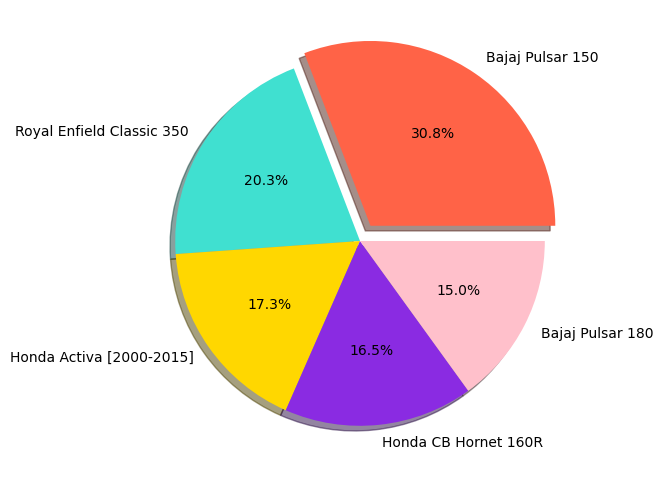

In [270]:
#3. What is the most common seller type 
#ans>>
top_bike = df["name"].value_counts(normalize = True)*100
top_bike_plot = top_bike.head(5)

#inter-changing key and values
pie_key = []
pie_value = []
for key , value in top_bike_plot.items():
    pie_key.append(key)
    pie_value.append(value)

#plot in pie chart
plt.figure(figsize = (8,6))
plt.pie(top_bike_plot ,labels = pie_key, colors = ['#FF6347', '#40E0D0', '#FFD700', '#8A2BE2','#FFC0CB'], shadow = True , explode = [0.1,0,0,0,0], autopct = "%1.1f%%" )
plt.show()


# insights >> top most selling bike is Bajaj Pulsar 150 with 30.8% of sales

In [271]:
#4. How many bikes have driven more than 50,000 kilometers 
df[df["km_driven"] > 50000].shape

#insights >> 170 bikes which are driven more than 50000 km

(170, 7)

In [272]:
#5. What is the average km_driven value for each ownership type 
df.groupby("owner")["km_driven"].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [273]:
#6. What proportion of bikes are from the year 2015 or older 
df["bike_older_2015"] = df["year"] <= 2015
df["bike_older_2015"].value_counts(normalize = True)*100

# insights >> 56.644675% of bikes are older then 2015

bike_older_2015
True     56.644675
False    43.355325
Name: proportion, dtype: float64

In [274]:
#7. What is the trend of missing values across the dataset 
df.isnull().sum()

# yes there is only one columns which consist null values

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
bike_older_2015        0
dtype: int64

In [275]:
#8. What is the highest ex_showroom_price recorded, and for which bike 
df[df["ex_showroom_price"] == df["ex_showroom_price"].max()]

#insights >> highest selling ex_showroom_price  is for Harley-Davidson Street Bob is RS 1278000

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_older_2015
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0,True


In [276]:
#9. What is the total number of bikes listed by each seller type ?
df["seller_type"].value_counts()

#insights >> total no. of bike listed by Individual is 1055 and  Dealer is 6

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

<Axes: xlabel='km_driven', ylabel='selling_price'>

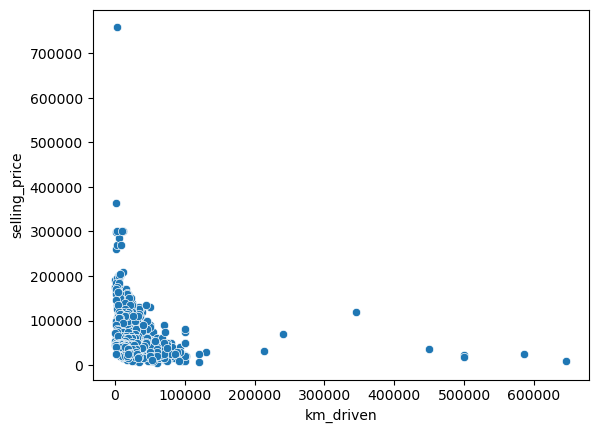

In [277]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes 
first_owner = df[df["owner"] == "1st owner"]
sns.scatterplot(data = first_owner , x = "km_driven" , y = "selling_price" , palette = "coolwarm")

In [278]:
#11. Identify and remove outliers in the km_driven column using the IQR method 

#to indentify outliers
outlier_values = []
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = (df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR) #it will give bool 
filtered_df = filtered_df.to_numpy() # now convert bool to numpy array

false_indices = np.argwhere(~filtered_df)
outlier_values.append(false_indices)
outlier_values


[array([[  91],
        [  93],
        [ 115],
        [ 135],
        [ 154],
        [ 184],
        [ 363],
        [ 470],
        [ 474],
        [ 477],
        [ 511],
        [ 535],
        [ 548],
        [ 575],
        [ 592],
        [ 598],
        [ 610],
        [ 630],
        [ 642],
        [ 668],
        [ 687],
        [ 695],
        [ 712],
        [ 714],
        [ 716],
        [ 726],
        [ 773],
        [ 782],
        [ 797],
        [ 830],
        [ 872],
        [ 877],
        [ 901],
        [ 903],
        [ 908],
        [ 930],
        [1039],
        [1056],
        [1060]], dtype=int64)]

<Axes: xlabel='year', ylabel='selling_price'>

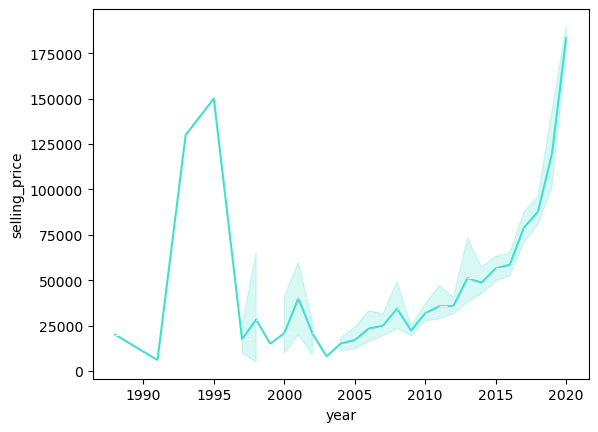

In [279]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price
sns.lineplot(data = df , x = "year", y = "selling_price", marker = True , color = "#40E0D0")

In [280]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) 
current_year = 2025
df["bike_age"] = current_year - df["year"]
depreciation = df.groupby("bike_age")["selling_price"].mean()

In [281]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_older_2015,bike_age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,False,6
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,False,8
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,False,7
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,True,10
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,True,14
...,...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,True,15
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,True,13
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,True,12
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,True,16


In [321]:
#14. Which bike names are priced significantly above the average price for their manufacturing year 
df["avg"] = df["selling_price"].mean()
df[df["selling_price"] > df["avg"]]

# for name 
#df[df["selling_price"] > df["avg"]].name

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_older_2015,bike_age,avg_price_year,avg
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,False,6,NaN,59638.151744
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,False,7,NaN,59638.151744
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,True,10,NaN,59638.151744
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,False,7,NaN,59638.151744
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,True,17,NaN,59638.151744
...,...,...,...,...,...,...,...,...,...,...,...
1001,Bajaj Avenger 150 street,60000,2018,Individual,1st owner,20000,80000.0,False,7,NaN,59638.151744
1002,Yamaha FZ v 2.0,60000,2017,Individual,1st owner,29000,84000.0,False,8,NaN,59638.151744
1003,Yamaha FZ v 2.0,60000,2018,Individual,1st owner,25000,84000.0,False,7,NaN,59638.151744
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,False,9,NaN,59638.151744


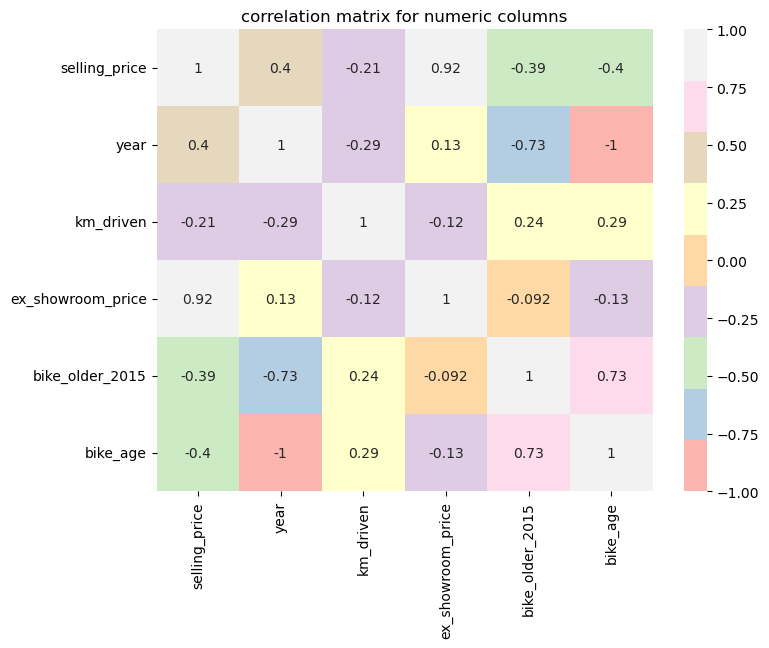

In [283]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr = df.corr(numeric_only = True)
plt.figure(figsize = (8,6))
sns.heatmap(corr , annot = True, cmap = "Pastel1")
plt.title("correlation matrix for numeric columns")
plt.show()

## **EDA - 2 Car Sale Dataset**

In [714]:
df2 = pd.read_csv("Car Sale.csv")

In [716]:
df2.shape

(23906, 16)

In [718]:
df2.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [720]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [722]:
df2.dropna(axis = 0 , inplace = True)

In [724]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23905 non-null  object
 1   Date           23905 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23905 non-null  object
 4   Annual Income  23905 non-null  int64 
 5   Dealer_Name    23905 non-null  object
 6   Company        23905 non-null  object
 7   Model          23905 non-null  object
 8   Engine         23905 non-null  object
 9   Transmission   23905 non-null  object
 10  Color          23905 non-null  object
 11  Price ($)      23905 non-null  int64 
 12  Dealer_No      23905 non-null  object
 13  Body Style     23905 non-null  object
 14  Phone          23905 non-null  int64 
 15  Dealer_Region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB


<Axes: title={'center': 'average selling price of cars for each dealer'}, xlabel='Dealer_Name'>

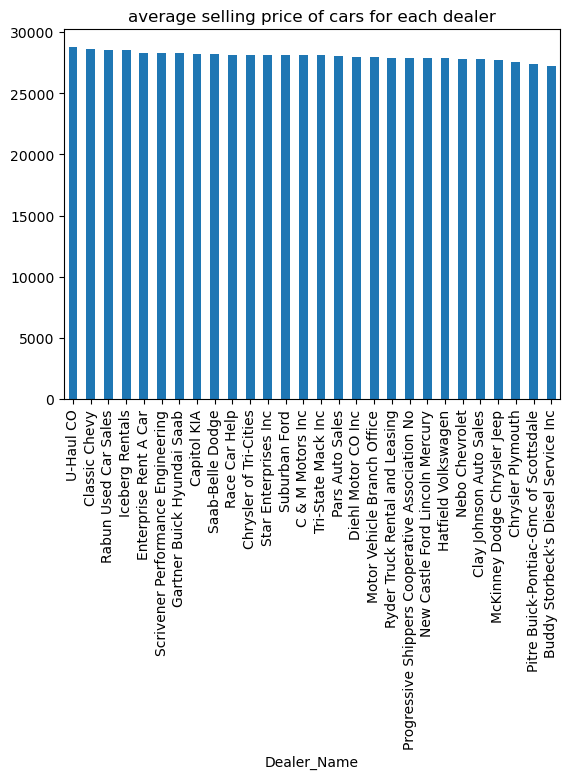

In [726]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers  
avgprice_by_dealerd = df2.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending = False)
avgprice_by_dealerd.plot(kind = "bar", title = "average selling price of cars for each dealer")

In [727]:
df2.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [730]:
df2.groupby("Company")["Price ($)"].std().sort_values(ascending = False).head(10)

Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Buick       17142.232626
Mercury     16445.172195
Nissan      16214.264017
Saturn      15990.223671
Ford        15849.090227
Name: Price ($), dtype: float64

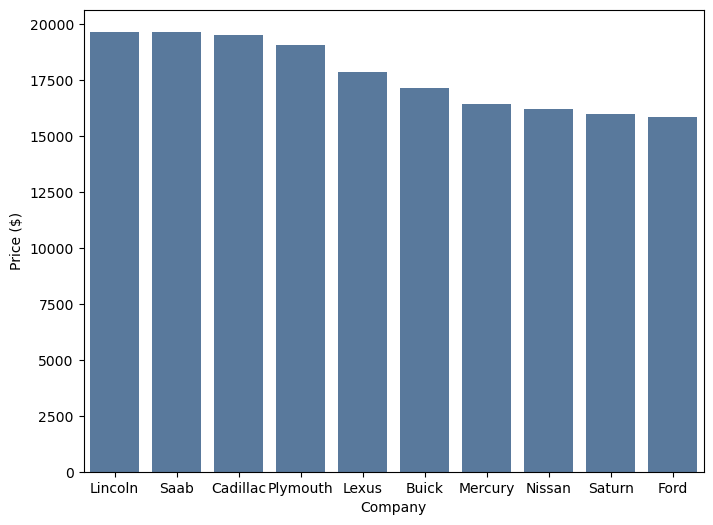

In [732]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends 
top_car = df2.groupby("Company")["Price ($)"].std().sort_values(ascending = False).head(10)
#inter-changing key and values
car_key = []
car_value = []
for key , value in top_car.items():
    car_key.append(key)
    car_value.append(value)

#plot in bar chart
plt.figure(figsize = (8,6))
sns.barplot(data = top_car, color = '#4E79A7' )
plt.show()



In [734]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

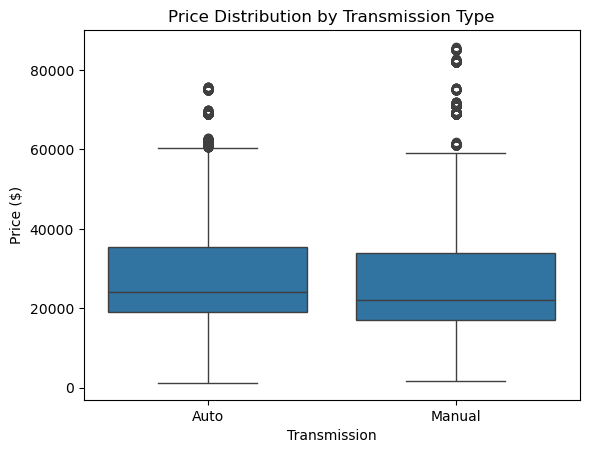

In [736]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare 
sns.boxplot(x='Transmission', y='Price ($)', data=df2)
plt.title('Price Distribution by Transmission Type')
plt.show()


#insights >> Manual and automatic cars have a similar price distribution, but automatic cars tend to have slightly higher median prices and more high-priced outliers

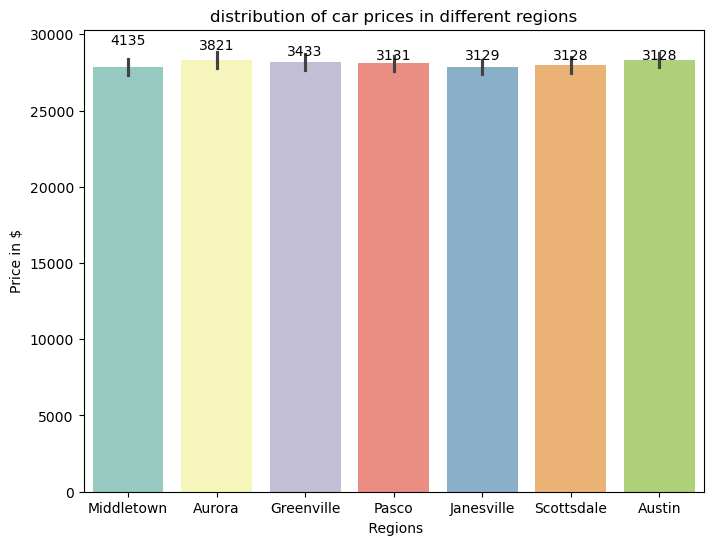

In [738]:
#4. What is the distribution of car prices across different regions 
plt.figure(figsize=(8,6))
sns.barplot(data = df2 , x = 'Dealer_Region' , y = 'Price ($)', palette = "Set3")

for i, region in enumerate(df2['Dealer_Region'].value_counts().index):
    count = df2['Dealer_Region'].value_counts()[region]
    plt.text(i, count + 25000, str(count), ha='center', va='bottom', fontsize=10)

plt.title("distribution of car prices in different regions")
plt.xlabel(" Regions")
plt.ylabel("Price in $")
plt.show()

# insights >> in middletown  car price is more higher than other regions

In [740]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [742]:
#5. What is the distribution of cars based on body styles


<Axes: xlabel='Price ($)', ylabel='Annual Income'>

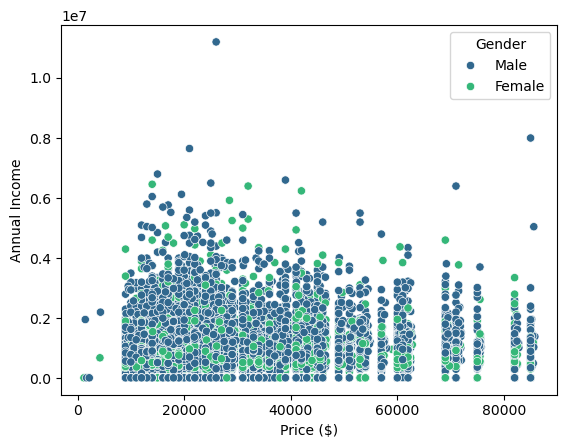

In [744]:
#6. How does the average selling price of cars vary by customer gender and annual income
sns.scatterplot(data = df2 , y = 'Annual Income', x = 'Price ($)',hue = "Gender" , palette="viridis")

# insights >> between  0 - 20000 price avg income males are more

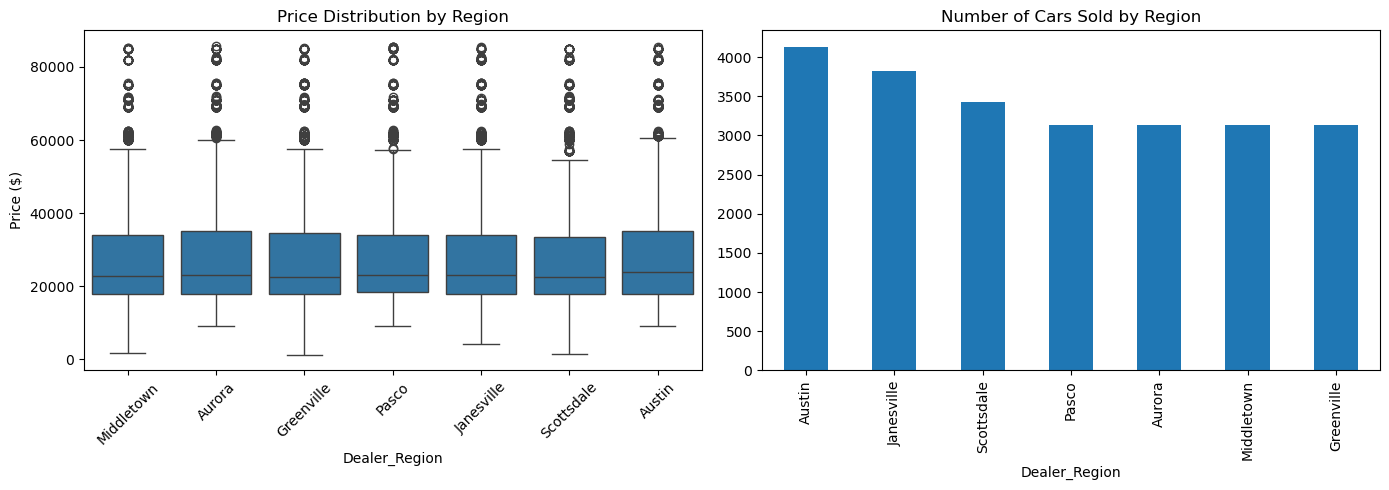

In [745]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region 
ig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2, ax=ax[0])
ax[0].set_title('Price Distribution by Region')
ax[0].tick_params(axis='x', rotation=45)

df2['Dealer_Region'].value_counts().plot(kind='bar', ax=ax[1], title='Number of Cars Sold by Region')
plt.tight_layout()
plt.show()


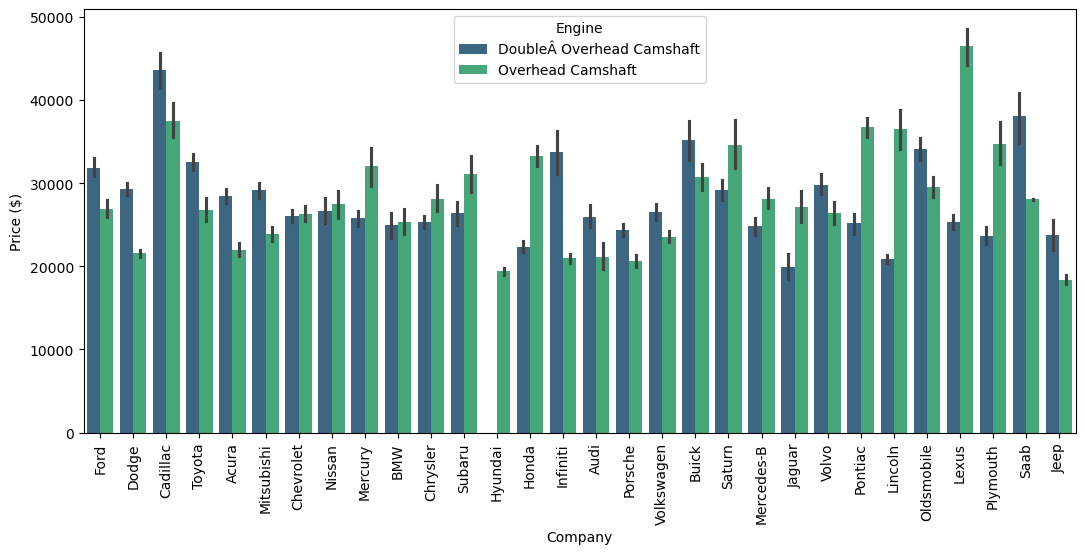

In [748]:
#8. How does the average car price differ between cars with different engine sizes 
plt.figure(figsize=(12.8,5.5))
sns.barplot(data = df2 , x = "Company" , y = "Price ($)" , hue = "Engine" , palette = "viridis")
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Price ($)', ylabel='Annual Income'>

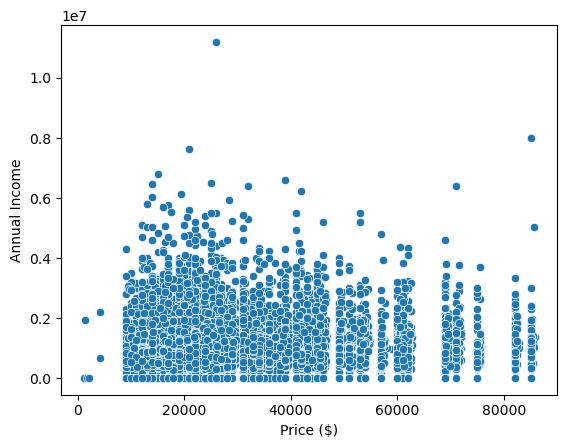

In [749]:
#9. How do car prices vary based on the customer’s annual income bracket
sns.scatterplot(data = df2 , y = "Annual Income" , x = "Price ($)" )

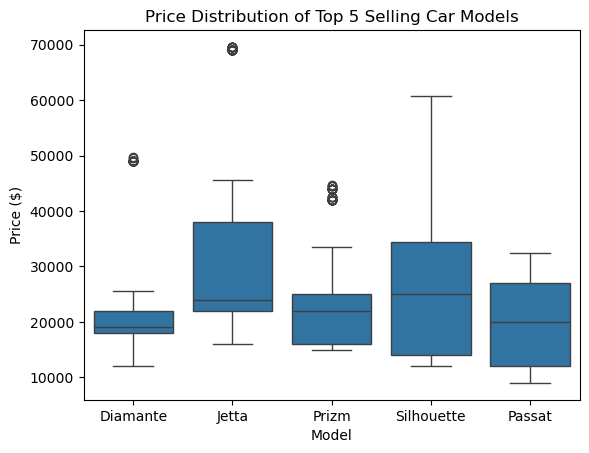

In [750]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look 
top_models = df2['Model'].value_counts().head(5).index
sns.boxplot(x='Model', y='Price ($)', data=df2[df2['Model'].isin(top_models)])
plt.title('Price Distribution of Top 5 Selling Car Models')
plt.show()

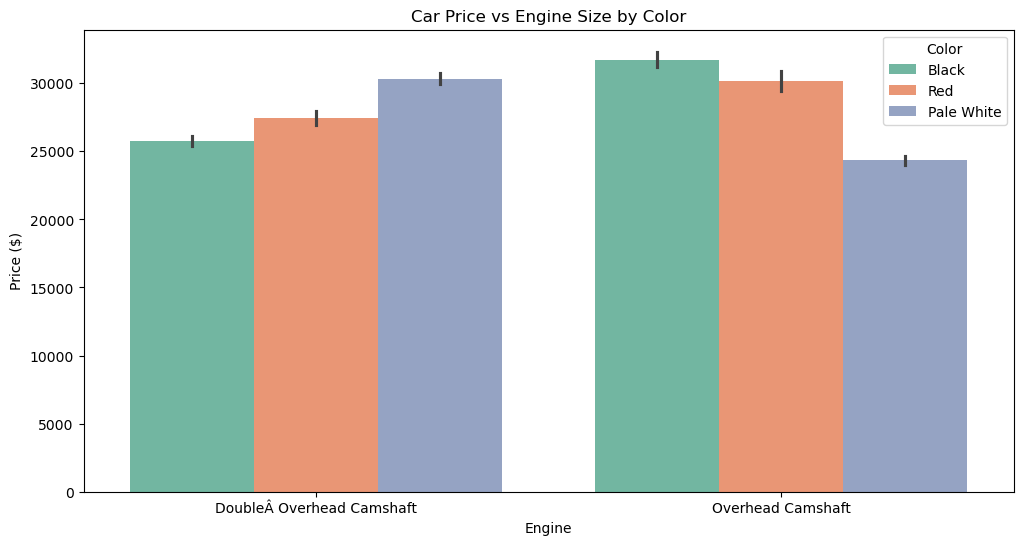

In [751]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation 
plt.figure(figsize=(12,6))
sns.barplot(data = df2 , x = "Engine", y = "Price ($)", hue = "Color", palette="Set2")
plt.title('Car Price vs Engine Size by Color')
plt.show()

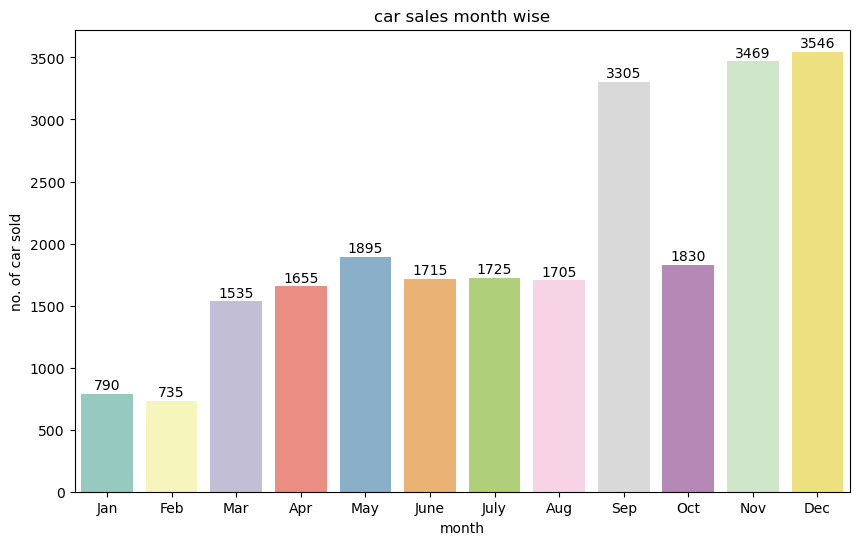

In [807]:
#12. Is there any seasonal trend in car sales based on the date of sale 
# convert to date time
df2["Date"] = pd.to_datetime(df2["Date"])

# separate month 
df2["month"] = df2["Date"].dt.month

# convert month no. to name
month_map = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",
    5: "May", 6: "June", 7: "July", 8: "Aug",
    9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
df2["month"] = df2["month"].replace(month_map)

# make month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July',
               'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Make 'month in order
df2["month"] = pd.Categorical(df2["month"], categories=month_order, ordered=True)

# Now get value_counts and sort by index (calendar order)
count_month = df2["month"].value_counts().sort_index()

# top 5 car sales month wise 
plt.figure(figsize=(10,6))
sns.countplot(data = df2 , x = "month" , palette = "Set3")
for i, v in enumerate(count_month):
    plt.text(i, v+10, str(v), ha="center", va="bottom", fontsize=10)
plt.title("car sales month wise")
plt.xlabel("month")
plt.ylabel("no. of car sold")
plt.show()


#insights >> in month of dec is high

In [809]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'month'],
      dtype='object')

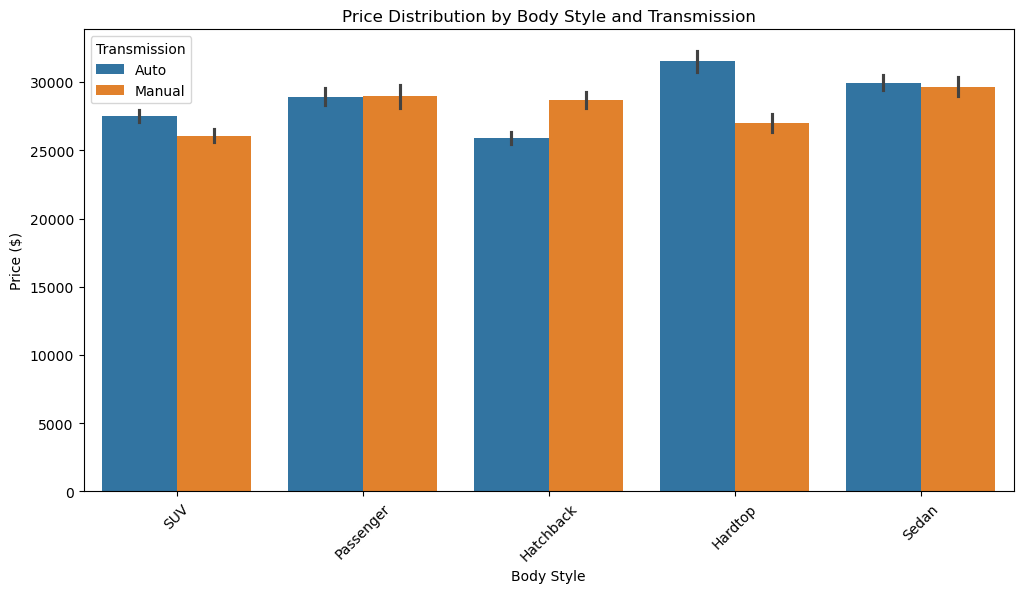

In [815]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type 
plt.figure(figsize=(12,6))
sns.barplot(x='Body Style', y='Price ($)', hue='Transmission', data=df2)
plt.title('Price Distribution by Body Style and Transmission')
plt.xticks(rotation=45)
plt.show()


# insights >> price of hardtop auto transmission is highest

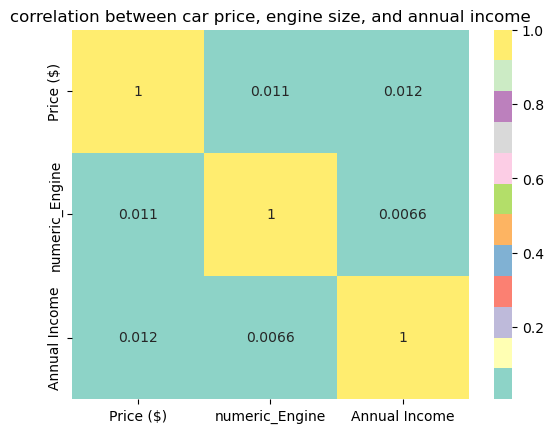

In [849]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

df2["numeric_Engine"] = df2["Engine"].map({"DoubleÂ Overhead Camshaft":1, "Overhead Camshaft":0})
df2["numeric_Engine"].fillna(1 , inplace=True)

corr = df2[["Price ($)" ,"numeric_Engine" , "Annual Income"]].corr()

sns.heatmap(corr , annot = True, cmap = "Set3")
plt.title("correlation between car price, engine size, and annual income")
plt.show()

In [851]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'month', 'numeric_Engine'],
      dtype='object')

Price ($)
Model    Engine                                 
3-Sep    DoubleÂ Overhead Camshaft  37986.380117
3000GT   DoubleÂ Overhead Camshaft  22764.326923
         Overhead Camshaft          21770.659864
300M     DoubleÂ Overhead Camshaft  21394.888889
323i     DoubleÂ Overhead Camshaft  16744.632287
...                                          ...
Windstar Overhead Camshaft          17100.272727
Wrangler DoubleÂ Overhead Camshaft  21145.294737
         Overhead Camshaft          18742.942029
Xterra   DoubleÂ Overhead Camshaft  15940.459459
         Overhead Camshaft          31072.500000

[261 rows x 1 columns]

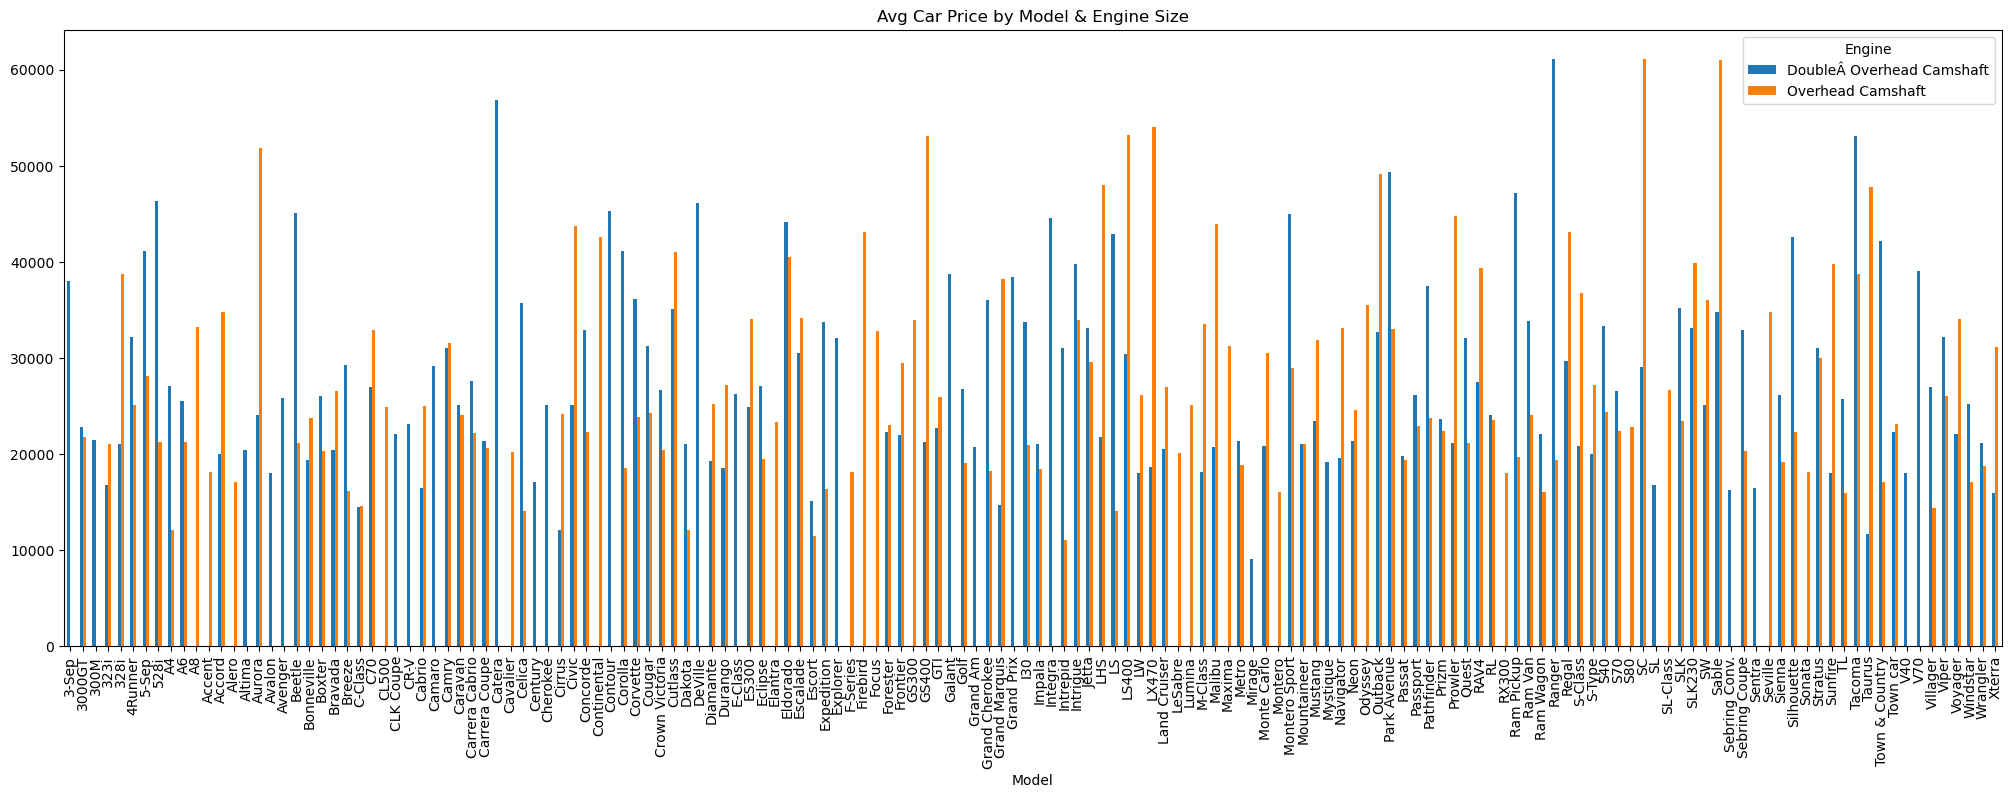

In [911]:
#15. How does the average car price vary across different car models and engine types?
price_model  = df2.groupby(["Model","Engine"])["Price ($)"].mean().unstack()
price_model.plot(kind = "bar" ,figsize = (25,8), title='Avg Car Price by Model & Engine Size')
plt.xticks(rotation = 90)
plt.show()

## **EDA - 3  Amazon Sales Data**

In [1439]:
df3 = pd.read_csv("amazon.csv")
df3.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [1441]:
df3.shape

(1465, 16)

In [1442]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [1443]:
df3.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [1444]:
df3.dropna(axis=0 , inplace= True)

In [1449]:
df3.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [1451]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

In [1453]:
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [1455]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [1457]:
df3["discounted_price"]

0         ₹399
1         ₹199
2         ₹199
3         ₹329
4         ₹154
         ...  
1460      ₹379
1461    ₹2,280
1462    ₹2,219
1463    ₹1,399
1464    ₹2,863
Name: discounted_price, Length: 1463, dtype: object

In [1459]:
# changing discounted price object to float
df3["discounted_price"] = df3["discounted_price"].str.replace("₹" , "").str.replace("," , "").str[::1]
df3["discounted_price"] = df3["discounted_price"].astype(float)
df3["discounted_price"]

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1463, dtype: float64

In [1461]:
# changing actual price object to float
df3["actual_price"] = df3["actual_price"].str.replace("₹" , "").str.replace("," , "").str[::1]
df3["actual_price"] = df3["actual_price"].astype(float)
df3["actual_price"]

0       1099.0
1        349.0
2       1899.0
3        699.0
4        399.0
         ...  
1460     919.0
1461    3045.0
1462    3080.0
1463    1890.0
1464    3690.0
Name: actual_price, Length: 1463, dtype: float64

In [1463]:
df3["actual_price"].dtypes

dtype('float64')

In [1465]:
# changing discounting % column object to float
df3["discount_percentage"] = df3["discount_percentage"].str.replace("%" , "").str[::1]
df3["discount_percentage"] = df3["discount_percentage"].astype(int)
df3["discount_percentage"]

0       64
1       43
2       90
3       53
4       61
        ..
1460    59
1461    25
1462    28
1463    26
1464    22
Name: discount_percentage, Length: 1463, dtype: int32

In [1467]:
df3["discount_percentage"].unique()

array([64, 43, 90, 53, 61, 85, 65, 23, 50, 33, 55, 63, 69, 60, 13, 44, 38,
       39, 46, 41, 70, 42, 72, 25, 51, 73,  0, 80, 28, 67, 58, 35, 45, 62,
       54, 27, 77, 56, 78, 31, 86, 47, 37, 75, 32, 68, 66, 22, 57, 17, 52,
       88, 20, 59, 40, 26, 29, 83, 71, 15, 76, 48, 82, 36, 89, 87, 24, 34,
       11, 91,  7, 19, 79, 21, 81, 18, 49, 30, 84, 10,  6, 14, 74,  4,  5,
       16,  8,  2, 94, 12,  3,  9])

In [1469]:
df3["rating"].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [1471]:
df3[df3["rating"] == "|"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [1473]:
df3.drop(df3[df3["rating"] == "|"].index, inplace=True , axis=0)

In [1475]:
df3["rating"].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '2', '3', '2.6', '2.9'],
      dtype=object)

In [1477]:
df3["rating"] = df3["rating"].astype(float)

In [1479]:
df3["rating_count"]

0       24,269
1       43,994
2        7,928
3       94,363
4       16,905
         ...  
1460     1,090
1461     4,118
1462       468
1463     8,031
1464     6,987
Name: rating_count, Length: 1462, dtype: object

In [1481]:
df3["rating_count"] = df3["rating_count"].str.replace("," , "")

In [1483]:
df3["rating_count"].dropna(axis=0 , inplace=True)

In [1485]:
df3["rating_count"] = df3["rating_count"].astype(float)

In [1487]:
df3["category"] = df3["category"].str.split( "|")
df3["category"]

0       [Computers&Accessories, Accessories&Peripheral...
1       [Computers&Accessories, Accessories&Peripheral...
2       [Computers&Accessories, Accessories&Peripheral...
3       [Computers&Accessories, Accessories&Peripheral...
4       [Computers&Accessories, Accessories&Peripheral...
                              ...                        
1460    [Home&Kitchen, Kitchen&HomeAppliances, WaterPu...
1461    [Home&Kitchen, Kitchen&HomeAppliances, SmallKi...
1462    [Home&Kitchen, Heating,Cooling&AirQuality, Roo...
1463    [Home&Kitchen, Heating,Cooling&AirQuality, Fan...
1464    [Home&Kitchen, Kitchen&HomeAppliances, SmallKi...
Name: category, Length: 1462, dtype: object

In [1517]:
df3["category_name"] = df3["category"].str[1]
df3["category_name"] 

0          Accessories&Peripherals
1          Accessories&Peripherals
2          Accessories&Peripherals
3          Accessories&Peripherals
4          Accessories&Peripherals
                   ...            
1460        Kitchen&HomeAppliances
1461        Kitchen&HomeAppliances
1462    Heating,Cooling&AirQuality
1463    Heating,Cooling&AirQuality
1464        Kitchen&HomeAppliances
Name: category_name, Length: 1462, dtype: object

In [1519]:
df3["category"]

0       [Computers&Accessories, Accessories&Peripheral...
1       [Computers&Accessories, Accessories&Peripheral...
2       [Computers&Accessories, Accessories&Peripheral...
3       [Computers&Accessories, Accessories&Peripheral...
4       [Computers&Accessories, Accessories&Peripheral...
                              ...                        
1460    [Home&Kitchen, Kitchen&HomeAppliances, WaterPu...
1461    [Home&Kitchen, Kitchen&HomeAppliances, SmallKi...
1462    [Home&Kitchen, Heating,Cooling&AirQuality, Roo...
1463    [Home&Kitchen, Heating,Cooling&AirQuality, Fan...
1464    [Home&Kitchen, Kitchen&HomeAppliances, SmallKi...
Name: category, Length: 1462, dtype: object

In [1521]:
df3["product_name"] = df3["category"].str[-1]
df3["product_name"]

0                      USBCables
1                      USBCables
2                      USBCables
3                      USBCables
4                      USBCables
                  ...           
1460    WaterPurifierAccessories
1461           Rice&PastaCookers
1462              HeatConvectors
1463                 ExhaustFans
1464              SandwichMakers
Name: product_name, Length: 1462, dtype: object

In [1523]:
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_name
0,B07JW9H4J1,USBCables,"[Computers&Accessories, Accessories&Peripheral...",399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Accessories&Peripherals
1,B098NS6PVG,USBCables,"[Computers&Accessories, Accessories&Peripheral...",199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Accessories&Peripherals
2,B096MSW6CT,USBCables,"[Computers&Accessories, Accessories&Peripheral...",199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Accessories&Peripherals
3,B08HDJ86NZ,USBCables,"[Computers&Accessories, Accessories&Peripheral...",329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Accessories&Peripherals
4,B08CF3B7N1,USBCables,"[Computers&Accessories, Accessories&Peripheral...",154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,WaterPurifierAccessories,"[Home&Kitchen, Kitchen&HomeAppliances, WaterPu...",379.0,919.0,59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Kitchen&HomeAppliances
1461,B01M6453MB,Rice&PastaCookers,"[Home&Kitchen, Kitchen&HomeAppliances, SmallKi...",2280.0,3045.0,25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-D

In [1509]:
df3.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int32
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
category_name           object
dtype: object

In [1511]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   int32  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

In [1525]:
#1. What is the average rating for each product category 
df3.groupby("category_name")["rating"].mean()

category_name
Accessories                                4.335714
Accessories&Peripherals                    4.149340
Arts&Crafts                                4.300000
Cameras&Photography                        4.125000
CarAccessories                             3.800000
Components                                 4.380000
CraftMaterials                             4.342857
Electrical                                 4.250000
ExternalDevices&DataStorage                4.316667
GeneralPurposeBatteries&BatteryChargers    4.350000
Headphones,Earbuds&Accessories             3.925758
Heating,Cooling&AirQuality                 3.990517
HomeAudio                                  4.068750
HomeMedicalSupplies&Equipment              4.000000
HomeStorage&Organization                   4.025000
HomeTheater,TV&Video                       4.075309
Kitchen&Dining                             4.100000
Kitchen&HomeAppliances                     4.053420
Laptops                                    4.00000

In [1191]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

<Axes: ylabel='rating_count'>

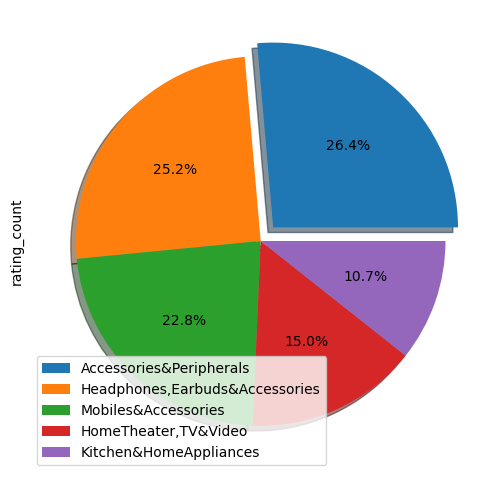

In [1527]:
#2. What are the top rating_count products by category 
df3.groupby("category_name")["rating_count"].sum().sort_values(ascending=False).head(5).plot(kind = "pie" , figsize=(6,6),autopct='%1.1f%%',shadow=True,labels=None,explode =[0.1,0,0,0,0], legend=True)

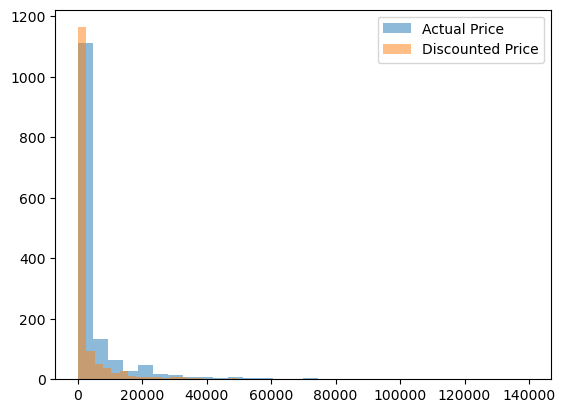

In [1529]:
#3. What is the distribution of discounted prices vs. actual prices 
plt.hist(df3['actual_price'], bins=30, alpha=0.5, label='Actual Price')
plt.hist(df3['discounted_price'], bins=30, alpha=0.5, label='Discounted Price')
plt.legend()
plt.show()

#insights >> both are right skwed data

In [1531]:
#4. How does the average discount percentage vary across categories 
df3.groupby("category_name")["discount_percentage"].mean()

category_name
Accessories                                57.785714
Accessories&Peripherals                    55.865435
Arts&Crafts                                 0.000000
Cameras&Photography                        47.562500
CarAccessories                             42.000000
Components                                 54.600000
CraftMaterials                              8.428571
Electrical                                 57.500000
ExternalDevices&DataStorage                46.888889
GeneralPurposeBatteries&BatteryChargers    16.714286
Headphones,Earbuds&Accessories             59.530303
Heating,Cooling&AirQuality                 40.681034
HomeAudio                                  49.687500
HomeMedicalSupplies&Equipment              53.000000
HomeStorage&Organization                   46.062500
HomeTheater,TV&Video                       49.469136
Kitchen&Dining                             60.000000
Kitchen&HomeAppliances                     40.335505
Laptops                         

<Axes: ylabel='count'>

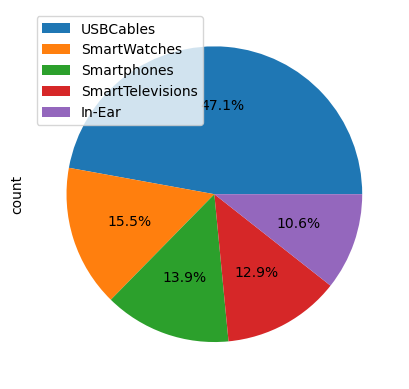

In [1533]:
#5. What are the most popular product names 
df3["product_name"].value_counts().head(5).plot(kind = "pie",legend = True,labels = None,autopct = "%1.1f%%")

In [1551]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'category_name'],
      dtype='object')

In [1403]:
#6. What are the most popular product keywords 
df3["product_link"].value_counts().head(5)

product_link
https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1                 1
https://www.amazon.in/Camel-Oil-Pastel-Reusable-Plastic/dp/B00LY12TH6/ref=sr_1_448?qid=1672903017&s=computers&sr=1-448                    1
https://www.amazon.in/Essentials-Reusable-Double-Organizer-Length/dp/B07R99NBVB/ref=sr_1_444?qid=1672903017&s=computers&sr=1-444          1
https://www.amazon.in/Tukzer-Foldable-Adjustable-Compatible-Smartphones/dp/B08MWJTST6/ref=sr_1_442?qid=1672903017&s=computers&sr=1-442    1
https://www.amazon.in/HP-Charger-Adapter-Pavilion-Black/dp/B01NBX5RSB/ref=sr_1_441?qid=1672903017&s=computers&sr=1-441                    1
Name: count, dtype: int64

In [1563]:
#7. What are the most popular product reviews 
df3.groupby("product_name")["rating"].mean().sort_values(ascending=False).head()

product_name
Tablets                            4.6
Film                               4.5
Memory                             4.5
SmallApplianceParts&Accessories    4.5
StreamingClients                   4.5
Name: rating, dtype: float64

<Axes: >

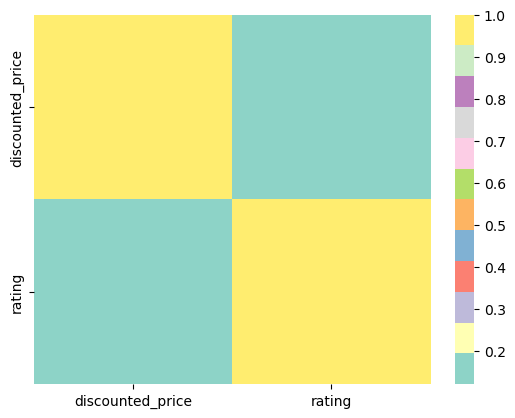

In [1395]:
#8. What is the correlation between discounted_price and rating 
corr = df3[["discounted_price","rating"]].corr()
sns.heatmap(corr, cmap="Set3")

In [1571]:
#9. What are the Top 5 categories based on the highest ratings 
df3.groupby("category_name")["rating"].mean().sort_values(ascending=False).head()

category_name
Tablets                                    4.60
PowerAccessories                           4.50
OfficeElectronics                          4.45
Components                                 4.38
GeneralPurposeBatteries&BatteryChargers    4.35
Name: rating, dtype: float64

In [1575]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

#ans.>> 1.Categories with low average ratings might need product quality review or better customer service
        # >> df3.groupby("category_name")["rating"].mean().sort_values(ascending=False).tail()
#       2.Correlation between price and rating could guide pricing optimization.

category_name
Heating,Cooling&AirQuality        3.990517
Printers,Inks&Accessories         3.963636
Headphones,Earbuds&Accessories    3.925758
Microphones                       3.900000
CarAccessories                    3.800000
Name: rating, dtype: float64

## **DA - 4 Spotify Data**

In [1804]:
df4 = pd.read_csv("spotify.csv")

In [1806]:
df4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [1808]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [1810]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful 
# Check  null values
print("Null values:\n", df4.isnull().sum())

#insights >> there is no null values

Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [1812]:
# Check for duplicates
print(f"Duplicate rows: {df4.duplicated().sum()}")

Duplicate rows: 27


In [1814]:
# Remove duplicates
df4 = df4.drop_duplicates()
# now again check for any duplicate rows
print(f"Duplicate rows: {df4.duplicated().sum()}")

Duplicate rows: 0


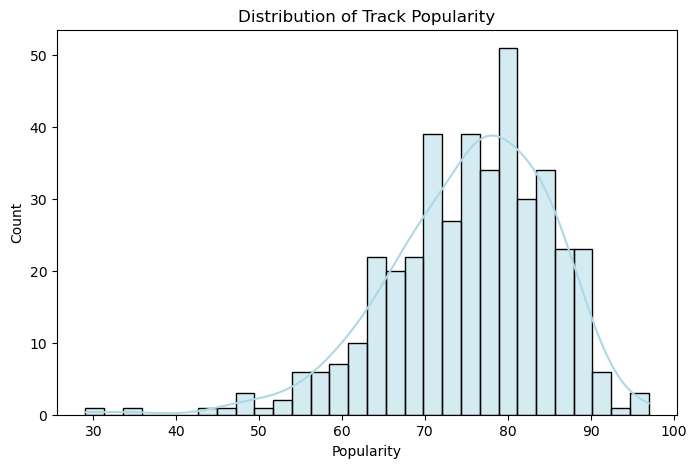

In [1816]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram 
plt.figure(figsize=(8,5))
sns.histplot(df4['Popularity'], bins=30, kde=True,color = "lightblue")
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

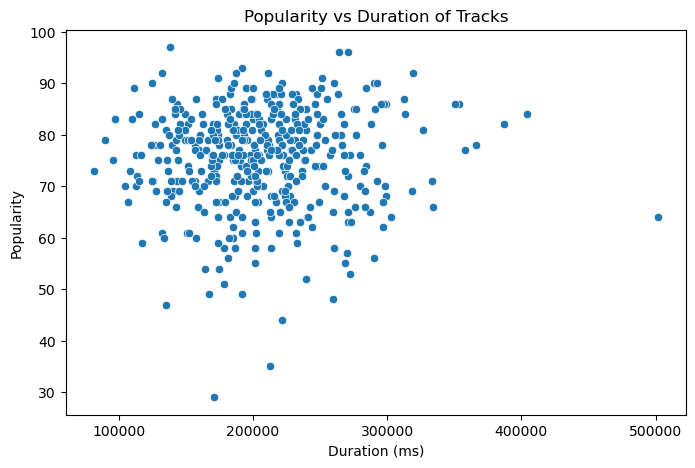

In [1818]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot 
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df4)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

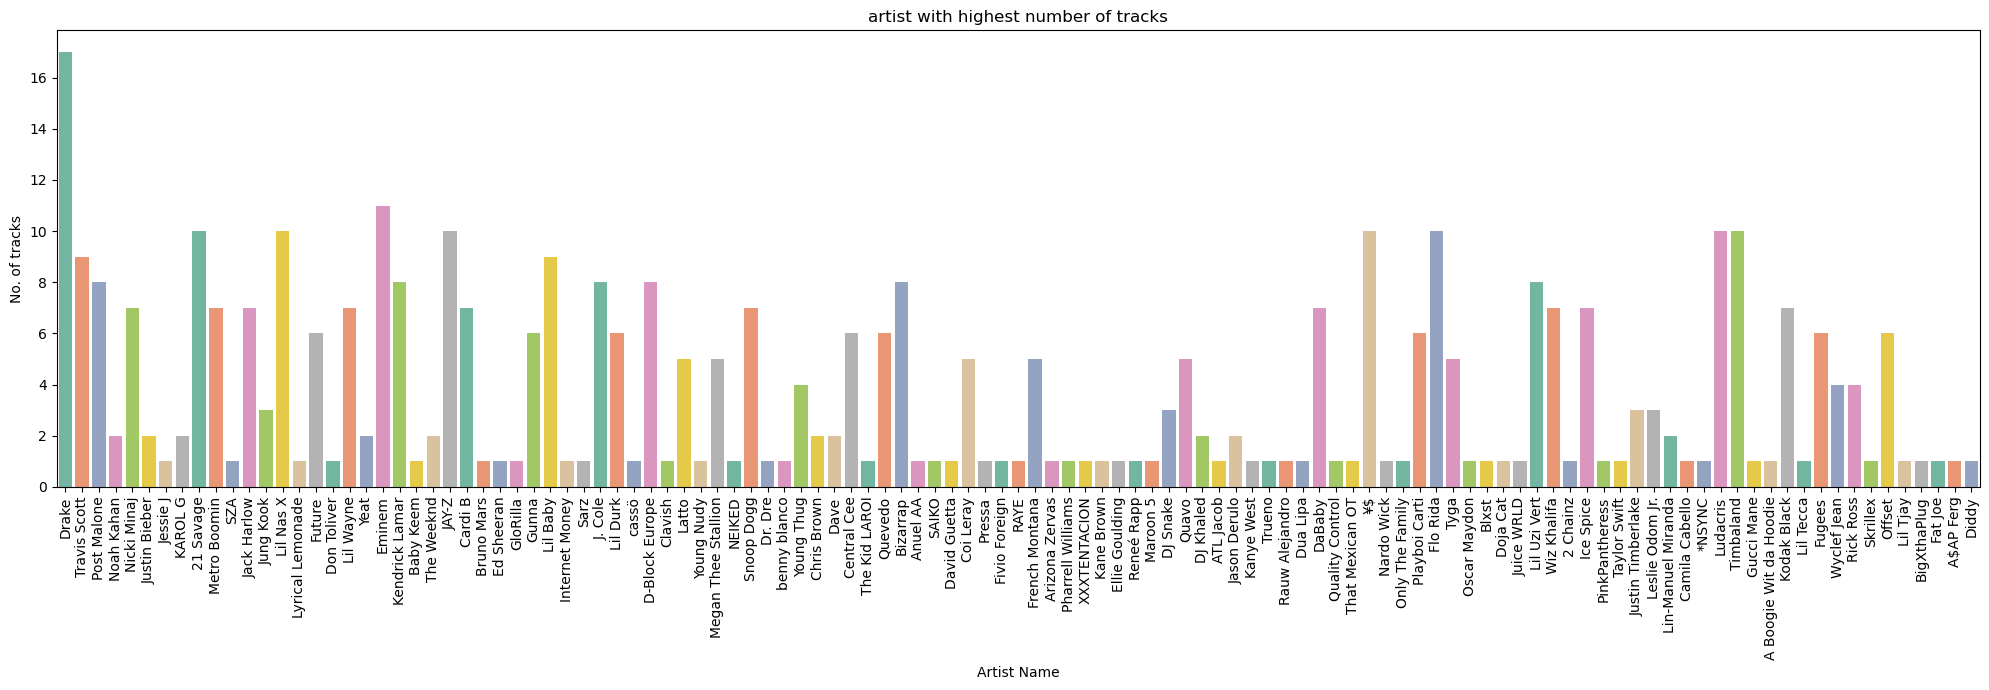

In [1820]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
plt.figure(figsize = (20,7))
sns.countplot(data = df4 ,x= "Artist", palette = "Set2")
plt.title("artist with highest number of tracks")
plt.xticks(rotation = 90)
plt.xlabel("Artist Name")
plt.ylabel("No. of tracks")
plt.tight_layout()
plt.show()

In [1825]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each 
df4.sort_values(by='Popularity', ascending=True).head(5)

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


In [1827]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist  
df4.groupby("Artist")["Popularity"].mean().sort_values(ascending = False).head(5)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

In [1904]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist 
top_tracks =df4[df4['Artist'].isin(df4['Artist'].value_counts().head(5).index)]

top_tracks.sort_values('Popularity', ascending=False).groupby('Artist').first()

,Track Name,Popularity,Duration (ms),Track ID
Artist,,,,
Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
Eminem,Without Me,90,290320,7lQ8MOhq6IN2w8EYcFNSUk
Flo Rida,Low (feat. T-Pain),84,231400,0CAfXk7DXMnon4gLudAp7J
Ludacris,My Chick Bad,67,216933,3bMNprrp2JDKZsGbiXpsJl
Timbaland,The Way I Are,85,179120,2bLqfJjuC5syrsgDsZfGmn


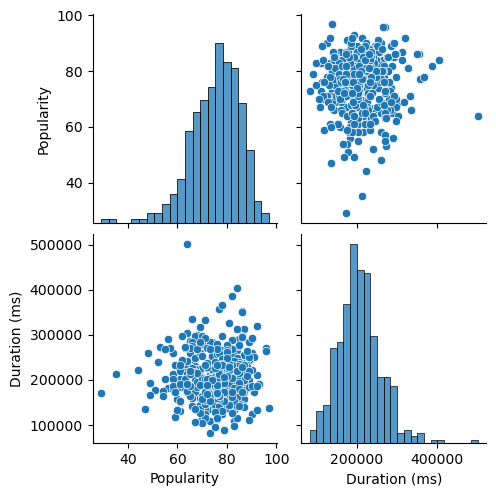

In [1852]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot 
num_col = ["Popularity", "Duration (ms)"]
sns.pairplot(df4[num_col])
plt.show()

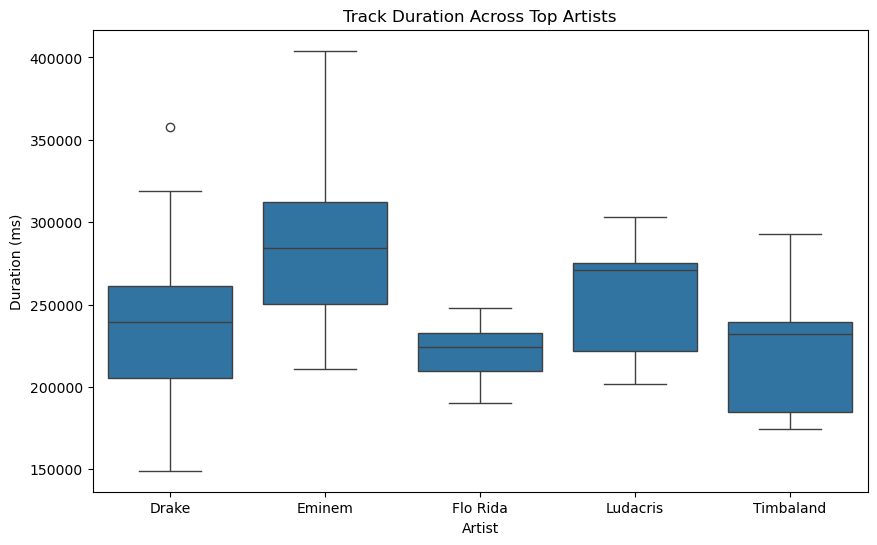

In [1882]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot 
plt.figure(figsize=(10,6))
top_artists_duration = df4[df4['Artist'].isin(df4['Artist'].value_counts().head(5).index)]
sns.boxplot(x='Artist', y='Duration (ms)', data=top_artists_duration)
plt.title('Track Duration Across Top Artists')
plt.ylabel('Duration (ms)')
plt.show()


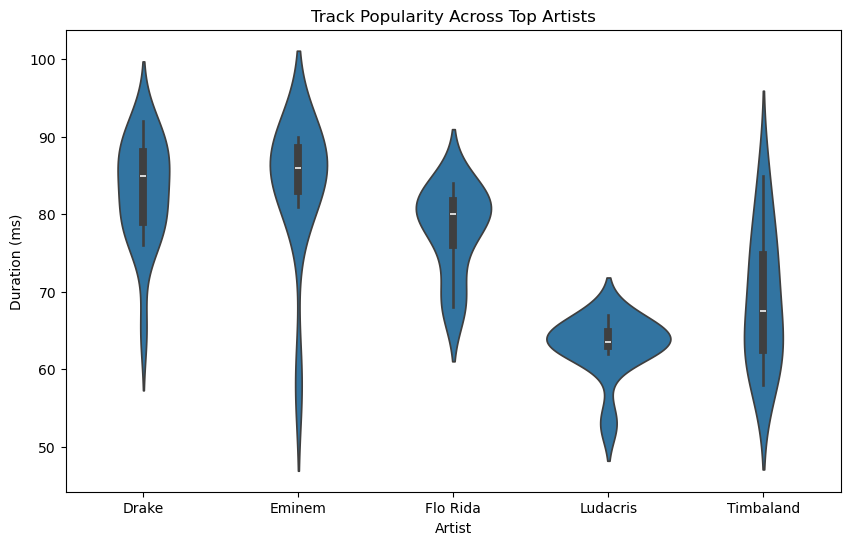

In [1888]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot. 
plt.figure(figsize=(10,6))
top_artists_duration = df4[df4['Artist'].isin(df4['Artist'].value_counts().head(5).index)]
sns.violinplot(x='Artist', y='Popularity', data=top_artists_duration)
plt.title('Track Popularity Across Top Artists')
plt.ylabel('Duration (ms)')
plt.show()